In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
# Loading the dataset (using the downloaded file)
# path = "/content/drive/Shareddrives/DATA_228_Project/Google-Playstore.csv"
# playstore = pd.read_csv(path)

In [4]:
# Loading the dataset (using the downloaded file)
path = "Google-Playstore.csv"
playstore = pd.read_csv(path)

In [5]:
# Checking the type of the 'playstore' object
type_playstore = type(playstore)
print(f"The type of 'Google-Playstore' is: {type_playstore}")

The type of 'Google-Playstore' is: <class 'pandas.core.frame.DataFrame'>


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Displaying initial 5 records
playstore.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,9-Aug-19,19-Aug-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/21 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19


In [8]:
# Displaying the shape of the 'playstore' DataFrame
playstore.shape              # First number indicate the no. of rows and second number indicates the no. of columns

(1048575, 24)

In [9]:
# Displaying the statistics of all columns
playstore.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,1048574,1048575,1048575,1.038265e+06,1.038265e+06,1048529,1.048529e+06,1.048575e+06,1048575,1.048575e+06,...,703358,1048567,1016542,1048575,1048575,857918,1048575,1048575,1048575,1048575
unique,1007971,1048575,48,NaN,NaN,21,NaN,NaN,2,NaN,...,414810,517860,4147,3717,6,490848,2,2,2,1007
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,100+,NaN,NaN,True,NaN,...,http://www.subsplash.com/,support@classplus.co,19-Feb-20,10-Jun-21,Everyone,http://www.subsplash.com/legal/privacy,False,False,False,6/16/21 4:46
freq,175,1,109089,NaN,NaN,201058,NaN,NaN,1028002,NaN,...,3436,4652,935,5029,916635,3412,526333,959986,1048186,1188
mean,NaN,NaN,NaN,2.205133e+00,2.937382e+03,NaN,1.761995e+05,3.044571e+05,NaN,1.019689e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.106423e+00,2.559674e+05,NaN,1.325964e+07,2.046633e+07,NaN,2.538256e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,5.000000e+01,8.400000e+01,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000e+00,6.000000e+00,NaN,5.000000e+02,6.950000e+02,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.300000e+00,4.200000e+01,NaN,5.000000e+03,7.361000e+03,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [10]:
# Displaying information about the 'playstore' dataset
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1048574 non-null  object 
 1   App Id             1048575 non-null  object 
 2   Category           1048575 non-null  object 
 3   Rating             1038265 non-null  float64
 4   Rating Count       1038265 non-null  float64
 5   Installs           1048529 non-null  object 
 6   Minimum Installs   1048529 non-null  float64
 7   Maximum Installs   1048575 non-null  int64  
 8   Free               1048575 non-null  bool   
 9   Price              1048575 non-null  float64
 10  Currency           1048513 non-null  object 
 11  Size               1048483 non-null  object 
 12  Minimum Android    1045657 non-null  object 
 13  Developer Id       1048565 non-null  object 
 14  Developer Website  703358 non-null   object 
 15  Developer Email    1048567 non-n

In [11]:
# Displaying the number of missing values in each column of the 'playstore' dataset
playstore.isnull().sum()

App Name                  1
App Id                    0
Category                  0
Rating                10310
Rating Count          10310
Installs                 46
Minimum Installs         46
Maximum Installs          0
Free                      0
Price                     0
Currency                 62
Size                     92
Minimum Android        2918
Developer Id             10
Developer Website    345217
Developer Email           8
Released              32033
Last Updated              0
Content Rating            0
Privacy Policy       190657
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

### 1. Checking for Duplicates and removing them (if any)

In [12]:
# Checking for duplicates in the dataset
app_id_duplicates = playstore.duplicated(subset=['App Id'])

# Displaying the number of duplicate rows
print(f"Number of duplicate rows: {app_id_duplicates.sum()}")

# Removing the duplicates
duplicates_removed = playstore.drop_duplicates()

Number of duplicate rows: 0


___

### 2. Rating and Rating Count

### a. Checking for "Outliers" in Rating column

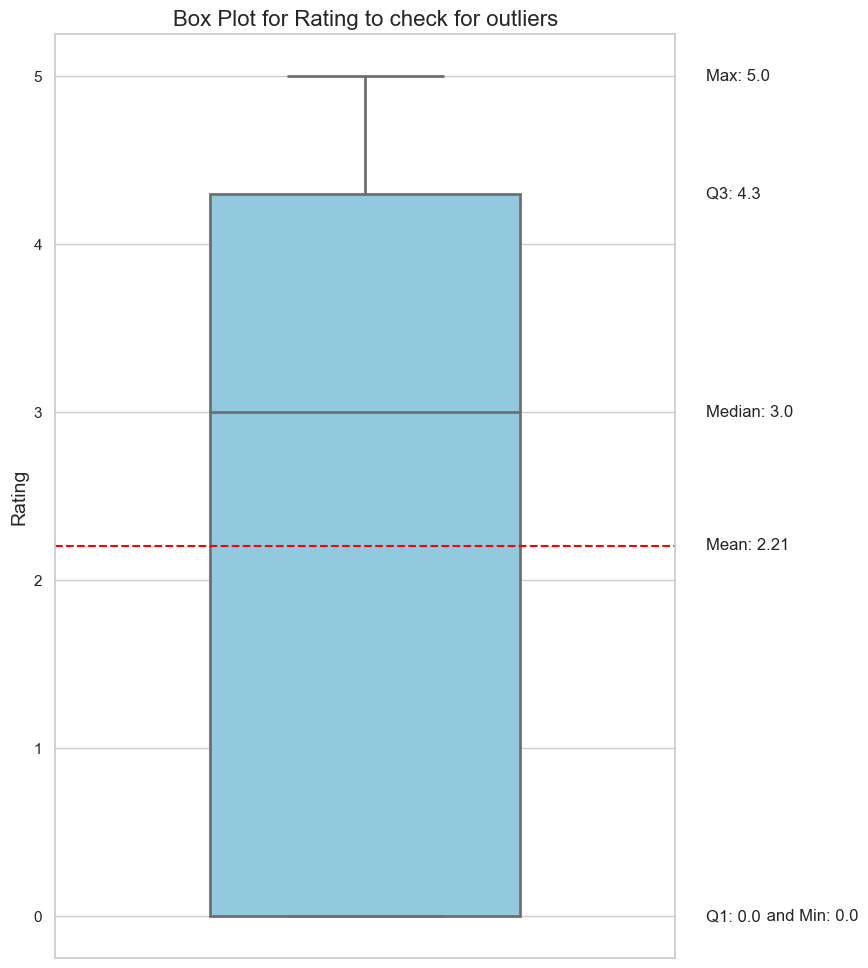

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting a whitegrid background for better visibility
sns.set(style="whitegrid")

# Creating a vertical box plot for the 'Rating'
plt.figure(figsize=(8, 12))
ax = sns.boxplot(y=playstore['Rating'], color='skyblue', width=0.5, linewidth=2)

q1 = playstore['Rating'].quantile(0.25)
q2 = playstore['Rating'].median()
q3 = playstore['Rating'].quantile(0.75)
mean_val = playstore['Rating'].mean()
max_val = playstore['Rating'].max()
min_val = playstore['Rating'].min()


# Displaying the values next to the box plot
ax.text(0.55, q1, f'Q1: {round(q1, 2)}', verticalalignment='center', fontsize=12)
ax.text(0.55, q2, f'Median: {round(q2, 2)}', verticalalignment='center', fontsize=12)
ax.text(0.55, q3, f'Q3: {round(q3, 2)}', verticalalignment='center', fontsize=12)
ax.text(0.55, mean_val, f'Mean: {round(mean_val, 2)}', verticalalignment='center', fontsize=12)
ax.text(0.55, max_val, f'Max: {round(max_val, 2)}', verticalalignment='center', fontsize=12)
ax.text(0.64, min_val, f' and Min: {round(min_val, 2)}', verticalalignment='center', fontsize=12)

# Adding a horizontal line for the mean
ax.axhline(mean_val, linestyle='--', color='red', label='Mean')

plt.title('Box Plot for Rating to check for outliers', fontsize=16)
plt.ylabel('Rating', fontsize=14)
plt.show()

<b><u>Observation:</u></b> The above boxplot indicates that there are no outliers present

### b. Handling missing values in Rating and Rating Count column by replacing them with "mean"

In [14]:
# Imputing Rating with mean
playstore['Rating'].fillna(playstore['Rating'].mean(), inplace=True)

# Imputing Rating Count with mean
playstore['Rating Count'].fillna(playstore['Rating Count'].mean(), inplace=True)

___

### 3. Installs

### Standardizing the column values by removing '+', removing decimal points, and replacing blanks with '0'

In [15]:
# Removing the '+' sign and convert the column to numeric
playstore['Installs'] = pd.to_numeric(playstore['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')

# Replace NaN values with 0
playstore['Installs'].fillna(0, inplace=True)

# Removing numbers after the decimal point and convert to integer
playstore['Installs'] = playstore['Installs'].astype(int)

# Displaying the cleaned DataFrame
playstore

/var/folders/h6/5781z52s1gxglkf7kt7vfng40000gn/T/ipykernel_89228/1327659740.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore['Installs'] = pd.to_numeric(playstore['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.00,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.00,...,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.00,...,NaN,vnacrewit@gmail.com,9-Aug-19,19-Aug-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.00,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/21 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.00,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MAFAB - Filmek adatbázisa,com.mafab.com.mafab_filmekadatbazisa,Entertainment,3.4,61.0,5000,5000.0,9851,True,0.00,...,https://www.mafab.hu,soos@mafab.hu,17-Aug-15,10-May-19,Everyone,NaN,True,False,False,6/16/21 13:05
1048571,Tweecha ThemeP:TheRollingPchan,net.sinproject.android.tweecha.theme.pichan.ro...,Social,0.0,0.0,10,10.0,15,False,1.49,...,http://sinproject.net,info@sinproject.net,12-Nov-13,19-Apr-16,Teen,NaN,False,False,False,6/16/21 13:05
1048572,Space Survival,com.dopaminit.sodapop,Arcade,4.4,47.0,10000,10000.0,22742,True,0.00,...,NaN,c8h11o2n1@gmail.com,19-Dec-18,2-Jan-19,Everyone,https://docs.google.com/document/d/1JG2ujKR2Rq...,True,True,False,6/16/21 13:05
1048573,Qarib Shop Owner,com.app.qaribshopowner,Food & Drink,0.0,0.0,5,5.0,9,True,0.00,...,NaN,Coldbloodedpredator@gmail.com,8-Jan-20,17-Jan-20,Everyone,https://appcdn.media/privacy/?app=QaribShopOwner,False,False,False,6/16/21 13:05


In [16]:
# # Saving the cleaned data to a new file ('cleaned_playstore.csv')
# playstore.to_csv("cleaned_playstore.csv", index=False)

___

### 4. Minimum Installs and Maximum Installs

### Standardizing the column values by removing decimal points and replacing blanks with '0'

In [17]:
# Replace NaN values with 0
playstore['Minimum Installs'].fillna(0, inplace=True)

# Removing numbers after the decimal point and convert to integer
playstore['Minimum Installs'] = playstore['Minimum Installs'].astype(int)

# Displaying the cleaned DataFrame
playstore

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.00,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.00,...,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.00,...,NaN,vnacrewit@gmail.com,9-Aug-19,19-Aug-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.00,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/21 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.00,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MAFAB - Filmek adatbázisa,com.mafab.com.mafab_filmekadatbazisa,Entertainment,3.4,61.0,5000,5000,9851,True,0.00,...,https://www.mafab.hu,soos@mafab.hu,17-Aug-15,10-May-19,Everyone,NaN,True,False,False,6/16/21 13:05
1048571,Tweecha ThemeP:TheRollingPchan,net.sinproject.android.tweecha.theme.pichan.ro...,Social,0.0,0.0,10,10,15,False,1.49,...,http://sinproject.net,info@sinproject.net,12-Nov-13,19-Apr-16,Teen,NaN,False,False,False,6/16/21 13:05
1048572,Space Survival,com.dopaminit.sodapop,Arcade,4.4,47.0,10000,10000,22742,True,0.00,...,NaN,c8h11o2n1@gmail.com,19-Dec-18,2-Jan-19,Everyone,https://docs.google.com/document/d/1JG2ujKR2Rq...,True,True,False,6/16/21 13:05
1048573,Qarib Shop Owner,com.app.qaribshopowner,Food & Drink,0.0,0.0,5,5,9,True,0.00,...,NaN,Coldbloodedpredator@gmail.com,8-Jan-20,17-Jan-20,Everyone,https://appcdn.media/privacy/?app=QaribShopOwner,False,False,False,6/16/21 13:05


In [18]:
# Replace NaN values with 0
playstore['Maximum Installs'].fillna(0, inplace=True)

# Removing numbers after the decimal point and convert to integer
playstore['Maximum Installs'] = playstore['Maximum Installs'].astype(int)

# Displaying the cleaned DataFrame
playstore

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.00,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.00,...,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.00,...,NaN,vnacrewit@gmail.com,9-Aug-19,19-Aug-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.00,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/21 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.00,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MAFAB - Filmek adatbázisa,com.mafab.com.mafab_filmekadatbazisa,Entertainment,3.4,61.0,5000,5000,9851,True,0.00,...,https://www.mafab.hu,soos@mafab.hu,17-Aug-15,10-May-19,Everyone,NaN,True,False,False,6/16/21 13:05
1048571,Tweecha ThemeP:TheRollingPchan,net.sinproject.android.tweecha.theme.pichan.ro...,Social,0.0,0.0,10,10,15,False,1.49,...,http://sinproject.net,info@sinproject.net,12-Nov-13,19-Apr-16,Teen,NaN,False,False,False,6/16/21 13:05
1048572,Space Survival,com.dopaminit.sodapop,Arcade,4.4,47.0,10000,10000,22742,True,0.00,...,NaN,c8h11o2n1@gmail.com,19-Dec-18,2-Jan-19,Everyone,https://docs.google.com/document/d/1JG2ujKR2Rq...,True,True,False,6/16/21 13:05
1048573,Qarib Shop Owner,com.app.qaribshopowner,Food & Drink,0.0,0.0,5,5,9,True,0.00,...,NaN,Coldbloodedpredator@gmail.com,8-Jan-20,17-Jan-20,Everyone,https://appcdn.media/privacy/?app=QaribShopOwner,False,False,False,6/16/21 13:05


___

### 5. Currency and Price


### Handling the missing values by replacing with 'XXX' and standardizing the values in 'Price' Column

In [19]:
# Replacing missing values in 'Currency' column with 'XXX'
playstore['Currency'].fillna('XXX', inplace=True)

In [20]:
# Creating a dictionary to store exchange rates for each currency to USD
exchange_rates = {
    'CAD': 1.37,     # Replacing with exchange rate
    'EUR': 0.92,     # Replacing with exchange rate
    'GBP': 0.81,     # Replacing with exchange rate
    'INR': 83.19,    # Replacing with exchange rate
    'KRW': 1305.18,  # Replacing with exchange rate
    'USD': 1.0,
    'VND': 24297.50, # Replacing with exchange rate
    'XXX': 1.0,      # Replacing with exchange rate
    'BRL': 4.86,     # Replacing with exchange rate
}

# Converting 'Price' values to USD based on the exchange rates
playstore['Price'] = playstore.apply(lambda row: row['Price'] * exchange_rates.get(row['Currency'], 1.0), axis=1)

# Dropping the 'Currency' column as it is no longer needed
playstore.drop(columns=['Currency'], inplace=True)

___

### 6. Size

### Converting the app size present in KB, MB & GB to MB

In [21]:
# Function to convert 'Size' values to MB
def convert_size_to_mb(size):
    if isinstance(size, float) and not np.isnan(size):
        return size  # Return the size unchanged for float values
    elif isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '').replace(',', '')) / 1024  # Convert KB to MB
        elif 'M' in size:
            return float(size.replace('M', '').replace(',', ''))
        elif 'G' in size:
            return float(size.replace('G', '').replace(',', '')) * 1024  # Convert GB to MB
    return np.nan


# Applying the function to the 'Size' column
playstore['Size'] = playstore['Size'].apply(convert_size_to_mb)

# Renaming the 'Size' column to 'Size_in_MB'
playstore.rename(columns={'Size': 'Size_in_MB'}, inplace=True)

# Converting 'Size_in_MB' values to numeric, replacing non-numeric values with NaN
playstore['Size_in_MB'] = pd.to_numeric(playstore['Size_in_MB'], errors='coerce')

# Replacing null values in 'Size_in_MB' with the median
median_size = playstore['Size_in_MB'].median()
playstore['Size_in_MB'].fillna(median_size, inplace=True)

___

### 7. Minimum Android

### Removing the text part after the numeric value

In [22]:
# Function to extract numeric values (with decimals) from a string
def extract_numeric(value):
    if isinstance(value, str):
        numeric_part = re.search(r'\d+(\.\d+)?', value)
        if numeric_part:
            return float(numeric_part.group())
    return np.nan

# Converting "Minimum Android" column to float by retaining numeric values (with decimals)
playstore['Minimum Android'] = playstore['Minimum Android'].apply(extract_numeric)

# Replace null values in "Minimum Android" with the median
median_android = playstore['Minimum Android'].median()
playstore['Minimum Android'].fillna(median_android, inplace=True)

___

In [23]:
playstore

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.00,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.00,...,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.00,...,NaN,vnacrewit@gmail.com,9-Aug-19,19-Aug-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.00,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/21 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.00,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MAFAB - Filmek adatbázisa,com.mafab.com.mafab_filmekadatbazisa,Entertainment,3.4,61.0,5000,5000,9851,True,0.00,...,https://www.mafab.hu,soos@mafab.hu,17-Aug-15,10-May-19,Everyone,NaN,True,False,False,6/16/21 13:05
1048571,Tweecha ThemeP:TheRollingPchan,net.sinproject.android.tweecha.theme.pichan.ro...,Social,0.0,0.0,10,10,15,False,1.49,...,http://sinproject.net,info@sinproject.net,12-Nov-13,19-Apr-16,Teen,NaN,False,False,False,6/16/21 13:05
1048572,Space Survival,com.dopaminit.sodapop,Arcade,4.4,47.0,10000,10000,22742,True,0.00,...,NaN,c8h11o2n1@gmail.com,19-Dec-18,2-Jan-19,Everyone,https://docs.google.com/document/d/1JG2ujKR2Rq...,True,True,False,6/16/21 13:05
1048573,Qarib Shop Owner,com.app.qaribshopowner,Food & Drink,0.0,0.0,5,5,9,True,0.00,...,NaN,Coldbloodedpredator@gmail.com,8-Jan-20,17-Jan-20,Everyone,https://appcdn.media/privacy/?app=QaribShopOwner,False,False,False,6/16/21 13:05


___

### 8. Last Updated and Released

### Convert date fields to proper format

In [24]:
from datetime import datetime,date
playstore['Last Updated']=pd.to_datetime(playstore['Last Updated'])
playstore['Released']=pd.to_datetime(playstore['Released'])

In [25]:
playstore = playstore.fillna({'Privacy Policy': 'Default Privacy Policy',
                              'App Name':'Unknown',
                              'Developer Id': '0',
                              'Developer Website':'https://'+playstore['App Name']+'/',
                              'Developer Email':'Unknown@x.com',
                              'Released':playstore['Last Updated']})

# Dropping records where 'Developer Website' is blank
playstore = playstore.dropna(subset=['Developer Website'])

# Saving the cleaned data to a new file ('cleaned_playstore.csv')
path1 = "cleaned_playstore.csv"
playstore.to_csv(path1, index=False)

In [26]:
playstore.isnull().sum()

playstore.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,...,https://Vibook/,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,Default Privacy Policy,True,False,False,6/15/21 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19
5,IMOCCI,com.imocci,Social,0.0,0.0,50,50,89,True,0.0,...,http://www.imocci.com,info@imocci.com,2018-12-24,2019-12-20,Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,6/15/21 20:19
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000,1000,2567,True,0.0,...,https://unlimited 4G data prank free app/,aitomgharfatimezzahra@gmail.com,2019-09-23,2019-09-27,Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,6/15/21 20:19
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,500,702,True,0.0,...,https://The Everyday Calendar/,elementuser03@gmail.com,2019-06-21,2019-06-21,Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,6/15/21 20:19
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10,10,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,2018-12-07,2018-12-07,Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,6/15/21 20:19
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000,50000,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,2019-09-22,2020-10-07,Everyone,http://bit.ly/EmojiThemePro,True,False,False,6/15/21 20:19


___

### 9. Creating a labelled column called "Popularity" to determine the popularity of the app based on 'Maximum Installs' and 'Rating Count'

In [27]:
# Creating a new column 'Popularity' based on conditions
playstore['Popularity'] = np.where((playstore['Maximum Installs'] > 300) & (playstore['Rating Count'] > 50), 'High', 'Low')

# Displaying the first few rows of the DataFrame to check the new column
playstore.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Popularity
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,...,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/21 20:19,Low
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,...,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/21 20:19,High
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,...,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/21 20:19,Low
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,...,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,Default Privacy Policy,True,False,False,6/15/21 20:19,Low
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,...,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/21 20:19,Low


In [28]:
# Saving the cleaned data to a new file ('cleaned_playstore.csv')
# path1 = "/content/drive/Shareddrives/DATA_228_Project/"
# playstore.to_csv(path1 + "cleaned_playstore.csv", index=False)

In [29]:
# Saving the cleaned data to a new file ('cleaned_playstore.csv')
playstore.to_csv("cleaned_playstore.csv", index=False)

___

## Verification

In [30]:
path_cleaned_file = "cleaned_playstore.csv"
cleaned_playstore_check = pd.read_csv(path_cleaned_file)
cleaned_playstore_check.info()
cleaned_playstore_check.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1048575 non-null  object 
 1   App Id             1048575 non-null  object 
 2   Category           1048575 non-null  object 
 3   Rating             1048575 non-null  float64
 4   Rating Count       1048575 non-null  float64
 5   Installs           1048575 non-null  int64  
 6   Minimum Installs   1048575 non-null  int64  
 7   Maximum Installs   1048575 non-null  int64  
 8   Free               1048575 non-null  bool   
 9   Price              1048575 non-null  float64
 10  Size_in_MB         1048575 non-null  float64
 11  Minimum Android    1048575 non-null  float64
 12  Developer Id       1048575 non-null  object 
 13  Developer Website  1048575 non-null  object 
 14  Developer Email    1048575 non-null  object 
 15  Released           1048575 non-n

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Size_in_MB           0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
Popularity           0
dtype: int64

In [31]:
cleaned_playstore_check.shape

(1048575, 24)